In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

pd.options.mode.chained_assignment = None
from matplotlib.legend_handler import HandlerPathCollection

In [2]:
# note: the two csv files below are made when running 'grit_histograms.ipynb'
res10 = pd.read_csv('~/SPECS_phil/data_tables/grits_correct_10c.csv')
res11 = pd.read_csv('~/SPECS_phil/data_tables/grits_correct_11c.csv')

In [3]:
# removing grit scores greater than 6
res10 = res10[:-2]
res11 = res11[:-2]

In [4]:
df = pd.DataFrame(
    {
        'grit': res10.x,
        'BF 10c': res10.bf_cor/(res10.bf_cor + res10.bf_fal),
        'BF 11c': res11.bf_cor/(res11.bf_cor + res11.bf_fal),
        'FL 10c': res10.fl_cor/(res10.fl_cor + res10.fl_fal),
        'FL 11c': res11.fl_cor/(res11.fl_cor + res11.fl_fal),
        'CP 10c': res10.cp_cor/(res10.cp_cor + res10.cp_fal),
        'CP 11c': res11.cp_cor/(res11.cp_cor + res11.cp_fal)
    }
)

In [5]:
df

,grit,BF 10c,BF 11c,FL 10c,FL 11c,CP 10c,CP 11c
0,0.761653,0.644513,0.584235,0.672334,0.667697,0.670788,0.607419
1,1.523306,0.725141,0.683865,0.739212,0.753283,0.741088,0.712946
2,2.284960,0.709091,0.706061,0.754545,0.740909,0.778788,0.754545
3,3.046613,0.763727,0.727121,0.760399,0.757072,0.801997,0.803661
4,3.808266,0.820541,0.803243,0.769730,0.761081,0.815135,0.811892
5,4.569919,0.873501,0.871320,0.817884,0.818975,0.846238,0.846238
6,5.331572,0.917832,0.905594,0.882867,0.851399,0.874126,0.874126
7,6.093225,0.912664,0.899563,0.860262,0.860262,0.873362,0.877729


In [6]:
df2 = pd.DataFrame(
    {
        'Grit': df['grit'],
        'DMSO incl.': ['No'] * len(df),
        'Accuracy': df['BF 10c'],
        'Category': ['BF'] * len(df)
    }
)

df2_add = pd.DataFrame(
    {
        'Grit': df['grit'],
        'DMSO incl.': ['Yes'] * len(df),
        'Accuracy': df['BF 11c'],
        'Category': ['BF'] * len(df)
    }
)

df2 = pd.concat([df2, df2_add], ignore_index=True, sort=False)

df2_add = pd.DataFrame(
    {
        'Grit': df['grit'],
        'DMSO incl.': ['No'] * len(df),
        'Accuracy': df['FL 10c'],
        'Category': ['FL'] * len(df)
    }
)

df2 = pd.concat([df2, df2_add], ignore_index=True, sort=False)

df2_add = pd.DataFrame(
    {
        'Grit': df['grit'],
        'DMSO incl.': ['Yes'] * len(df),
        'Accuracy': df['FL 11c'],
        'Category': ['FL'] * len(df)
    }
)

df2 = pd.concat([df2, df2_add], ignore_index=True, sort=False)

df2_add = pd.DataFrame(
    {
        'Grit': df['grit'],
        'DMSO incl.': ['No'] * len(df),
        'Accuracy': df['CP 10c'],
        'Category': ['CP'] * len(df)
    }
)

df2 = pd.concat([df2, df2_add], ignore_index=True, sort=False)

df2_add = pd.DataFrame(
    {
        'Grit': df['grit'],
        'DMSO incl.': ['Yes'] * len(df),
        'Accuracy': df['CP 11c'],
        'Category': ['CP'] * len(df)
    }
)

df2 = pd.concat([df2, df2_add], ignore_index=True, sort=False)

In [7]:
df2

,Grit,DMSO incl.,Accuracy,Category
0,0.761653,No,0.644513,BF
1,1.523306,No,0.725141,BF
2,2.284960,No,0.709091,BF
3,3.046613,No,0.763727,BF
4,3.808266,No,0.820541,BF
5,4.569919,No,0.873501,BF
6,5.331572,No,0.917832,BF
7,6.093225,No,0.912664,BF
8,0.761653,Yes,0.584235,BF
9,1.523306,Yes,0.683865,BF


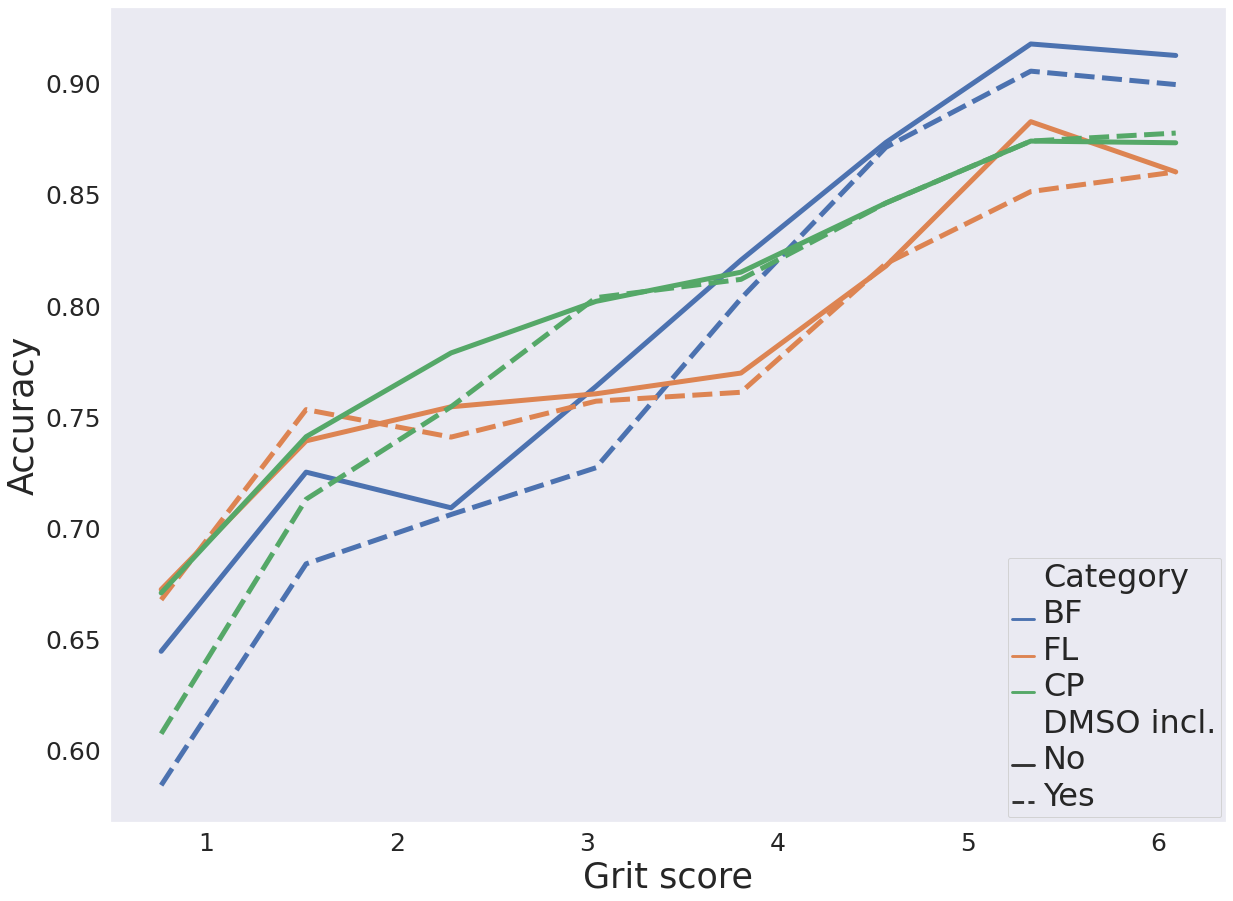

In [8]:
sns.set_theme(style="dark")
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

sns.lineplot(x="Grit", y="Accuracy",
             hue="Category", style="DMSO incl.",
             lw=5,
             data=df2)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

leg = ax.legend(loc='lower right')

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(2.9)

plt.setp(ax.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='42') # for legend title

ax.set_xlabel('Grit score', fontsize=35)
ax.set_ylabel('Accuracy', fontsize=35)

plt.savefig('grit_10c_vs_11c.png', bbox_inches='tight', format='png')

plt.show()
plt.close()